In [35]:
import pandas as pd
import numpy as np

In [43]:
num_of_rows = 6500
df = pd.read_csv('./dating-full.csv', nrows=num_of_rows)
df.shape

(6500, 53)

In [44]:
def contains_single_quote(s):
    if s.startswith("'") or s.endswith("'"):
        return True
    else:
        return False

def strip_quotes(df, strip_quotes_list):
    count = 0
    for index in df.index:
        for col in strip_quotes_list:
            if contains_single_quote(df.loc[index, col]):
                count+=1
                df.loc[index, col] = df.loc[index, col].replace('\'','')
    return count

# for 1-a-ii problem
def to_lower(df):
    val = df['field'].values
    count=0
    for value in val:
        if not(value.islower()):
            count+=1 
    df['field'] = df['field'].str.lower()
    return df, count

def normalize(df, preference_scores_of_participant, preference_scores_of_partner):
    for ind in df.index:
        total=0
        for col in preference_scores_of_participant:
            total+= df[col][ind]
        for col in preference_scores_of_participant:
            df.loc[ind, col] = df[col][ind]/total
        total=0
        for col in preference_scores_of_partner:
            total+= df[col][ind]
        for col in preference_scores_of_partner:
            df.loc[ind, col] = df[col][ind]/total
    for col in preference_scores_of_participant:
        print("Mean of "+ col + ": " ,round(df[[col]].mean()[0], 2))
    for col in preference_scores_of_partner:
        print("Mean of "+ col + ": " , round(df[[col]].mean()[0], 2))
    return df

In [45]:
strip_quotes_list = ['race','race_o','field']
count = strip_quotes(df, strip_quotes_list)
print("Quotes removed from " + str(count) + " cells")

# for 1-b
df, count = to_lower(df)
print("Standardized " + str(count) + " cells to lower case")

# for 1-d
preference_scores_of_participant = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important', 'ambition_important', 'shared_interests_important']
preference_scores_of_partner = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']

df = normalize(df, preference_scores_of_participant, preference_scores_of_partner)

Quotes removed from 7947 cells
Standardized 5463 cells to lower case
Mean of attractive_important:  0.22
Mean of sincere_important:  0.18
Mean of intelligence_important:  0.2
Mean of funny_important:  0.17
Mean of ambition_important:  0.11
Mean of shared_interests_important:  0.12
Mean of pref_o_attractive:  0.22
Mean of pref_o_sincere:  0.17
Mean of pref_o_intelligence:  0.2
Mean of pref_o_funny:  0.17
Mean of pref_o_ambitious:  0.11
Mean of pref_o_shared_interests:  0.12


In [47]:
one_hot_encoding_list = ['gender','race','race_o','field']
for i in range (0,df.shape[0]): #removing spaces from data
	df[one_hot_encoding_list[0]].values[i] = df[one_hot_encoding_list[0]].values[i].strip()
unq_count = len(df[one_hot_encoding_list[0]].unique())
unq_val =  df[one_hot_encoding_list[0]].unique()
unq_val_sorted = sorted(unq_val)
#print unq_gender_count, unq_gender_val, unq_gender_val_sorted #ok

# for i in range (0,df.shape[0]): #removing spaces from data
# 	df.race.values[i] = df.race.values[i].strip()
# unq_race_count = len(df.race.unique())
# unq_race_val =  df.race.unique()
# unq_race_val_sorted = sorted(unq_race_val)
# #print unq_race_count, unq_race_val, unq_race_val_sorted  #ok

# for i in range (0,df.shape[0]): #removing spaces from data
# 	df.race_o.values[i] = df.race_o.values[i].strip()
# unq_race_o_count = len(df.race_o.unique())
# unq_race_o_val =  df.race_o.unique()
# unq_race_o_val_sorted = sorted(unq_race_o_val)
#print unq_race_o_count, unq_race_o_val, unq_race_o_val_sorted #ok


for i in range (0,df.shape[0]): #removing spaces from data
	df.field.values[i] = df.field.values[i].strip()
unq_field_count = len(df.field.unique())
unq_field_val =  df.field.unique()
unq_field_val_sorted = sorted(unq_field_val)

S = pd.Series( {one_hot_encoding_list[0]: unq_val })
#print(S)
one_hot = pd.get_dummies(S[one_hot_encoding_list[0]])
'''
print(one_hot)
one_hot.drop(columns = ['male'], inplace=True) #drop last column
print(one_hot)
one_hot.drop(one_hot.tail(1).index,inplace=True) # drop last row
print(one_hot)
'''
female_arr = []
for i in range (0, one_hot.shape[0] - 1):
	female_arr.append(one_hot['female'].values[i])
print ("Mapped vector for female in column gender: ", female_arr)



# S = pd.Series( {'race': unq_race_val_sorted})
# #print(S)
# one_hot = pd.get_dummies(S['race'])
# #print(one_hot['Black/African American'])
# blck_aa_arr = []
# for i in range (0, one_hot.shape[0] - 1):
# 	blck_aa_arr.append(one_hot['Black/African American'].values[i])
# print ("Mapped vector for Black/African American in column race: ", blck_aa_arr)


# S = pd.Series( {'race_o': unq_race_o_val_sorted})
# #print(S)
# one_hot = pd.get_dummies(S['race_o'])
# #print(one_hot.Other)
# other_arr = []
# for i in range (0, one_hot.shape[0]-1):
# 	other_arr.append(one_hot['Other'].values[i])
# print ("Mapped vector for Other in column race_o: ", other_arr)


S = pd.Series( {'field': unq_field_val_sorted})
#print(S)
one_hot = pd.get_dummies(S['field'])
#print(one_hot.economics)
economics_arr = []
for i in range (0, one_hot.shape[0]-1):
	economics_arr.append(one_hot['economics'].values[i])
print ("Mapped vector for economics in column field: ", economics_arr)

#print df.head(10)
df = pd.get_dummies(data=df, columns=['gender', 'race','race_o','field'])
#print df.shape # before dropping number of rows = 6500 , columns = 265
df.drop(columns = ['gender_male'], axis=1, inplace=True)
df.drop(columns = ['race_Other'], axis=1, inplace=True)
df.drop(columns = ['race_o_Other'], axis=1, inplace=True)
df.drop(columns = ['field_writing: literary nonfiction'], axis=1, inplace=True)
#print df.head(10)
#print df.shape  # number of rows = 6500 , columns = 261
#print df.columns


# one_hot_encoding_list = ['gender','race','race_o','field']
# df = pd.get_dummies(df, columns = one_hot_encoding_list)

# df['race']

Mapped vector for female in column gender:  [1]
Mapped vector for economics in column field:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
m = df.columns
m

Index(['age', 'age_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       ...
       'field_stats', 'field_tc [health ed]', 'field_teaching of english',
       'field_tesol', 'field_theater', 'field_theatre management & producing',
       'field_undergrad - gs', 'field_urban planning', 'field_working',
       'field_writing: literary nonfiction'],
      dtype='object', length=265)

In [48]:
def train_test_split(df):
    test_df = df.sample(random_state=25, frac=0.2)
    print("LEN", test_df.shape[0])
    train_df = df.drop(test_df.index)
    print("LEN", train_df.shape[0])
    return train_df, test_df

def split_data(df, train_filename, test_filename):
    # df = pd.read_csv(input_filename)
    train_df, test_df = train_test_split(df)
    train_df.to_csv(train_filename, index = False)
    test_df.to_csv(test_filename, index = False)

split_data(df, 'trainingSet.csv', 'testSet.csv')

LEN 1300
LEN 5200


In [49]:
# from scipy.special import expit
# def sigmoid(z):
#     return 1/(1+expit(-z))
def sigmoid(z):
	    return(1 / (1 + np.exp(-z)))  # z = w.T.dot(x_i)

In [50]:
def cost_func(features, target, weights, lamb):
    scores = np.dot(features, weights)
    cf = np.sum( target*scores - np.log(1 + np.exp(scores)) )  +  lamb/(2) * sum(weights**2)
    return cf

In [52]:
def logistic_regression(features, target, lamb, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
    	#print "features before",features.shape
        intercept = np.ones((features.shape[0], 1))
        #print "intercept", intercept.shape
        features = np.hstack((intercept, features))
        #print "features after",features.shape
    
    weights = np.zeros(features.shape[1])
    #print "weights loop", weights.shape
   
    
    for step in range(0, num_steps):
        w1 = np.array(weights)
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
       	output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal) +  (lamb * weights)
        weights += learning_rate * gradient
        w2 = np.array(weights)
        #print "w2", w2, type(w2)
        diff = np.subtract(w2, w1)
        #print "diff", diff
        l2 = norm(diff)
        #print "l2", l2
        if l2 < 0.000001:
        	break
        
    	
        # Print log-likelihood every so often
        #if step % 10 == 0:
            #print cost_func(features, target, weights)
    return weights

In [59]:
modelIdx = '1'
df1 = pd.read_csv( 'trainingSet.csv') #training set
print(df1.shape)
df2 = pd.read_csv('testSet.csv') #test set

if modelIdx == '1': #LR

	# X_train = df1.values[0:, 0:260]
	# Y_train = df1.values[0:, 260:261]
	Y_train = df1['decision'].values
	list_col = list(df1.columns)
	list_col.remove('decision')
	X_train = df1[list_col].values
	#print "X_train", type(X_train), X_train
	#print Y_train, len(Y_train)
	#y = (df1.iloc[:, 261:262]).values
	#print y, len(y)
	#y_train = y_train.ravel()
	# X_test = df2.values[0:, 0:260]
	Y_test = df2['decision'].values
	# Y_test = df1['decision'].values
	# list_col = list(df2.columns)
	# list_col.remove('decision')
	X_test = df2[list_col].values
	#y_test = y_test.ravel()



	#Logistic Regression

	train_features = X_train
	train_labels = Y_train.reshape(Y_train.shape[0],)
	test_label = Y_test.reshape(Y_test.shape[0],)
	lamb = 0.01 

	#learning part
	#step_size = learning rate
	weights = logistic_regression(train_features, train_labels, lamb=lamb, num_steps = 500, learning_rate = 0.01, add_intercept=True)
	#print "weights", weights.shape
	# prediction for training
	data_with_intercept = np.hstack((np.ones((train_features.shape[0], 1)),train_features))
	#print "data_with_intercept ",data_with_intercept.shape
	final_scores = np.dot(data_with_intercept, weights)
	preds = np.round(sigmoid(final_scores))
	train_accuracy_LR = (preds == train_labels).sum().astype(float) / len(preds)
	print ('Training Accuracy LR:', round(train_accuracy_LR,2))

	# prediction for testing 
	data_with_intercept2 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
	final_scores2 = np.dot(data_with_intercept2, weights)
	preds2 = np.round(sigmoid(final_scores2))
	# print("Hello")
	test_accuracy_LR = (preds2 == test_label).sum().astype(float) / len(preds2) 
	print ('Testing Accuracy LR:',round(test_accuracy_LR,2))

(5200, 1)
(5200, 264)
(5200, 265)
(5200, 261)


C:\Users\garga\AppData\Local\Temp/ipykernel_20896/1239250713.py:5: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))  # z = w.T.dot(x_i)


Training Accuracy LR: 0.66
Hello
Testing Accuracy LR: 0.66


In [62]:
def svm(features, target, lamb, num_steps2, learning_rate, add_intercept = False):
	if add_intercept:
		#print "features before",features.shape
		intercept = np.ones((features.shape[0], 1))
		#print "intercept", intercept.shape
		features = np.hstack((intercept, features))
		#print "features after",features.shape
		
	weights = np.zeros(features.shape[1])
	out = []
	N = target.shape[0]
	#print N
	for step in range (0,num_steps2):
		#print "step", step
		for i, val in enumerate(features):
			w1 = np.array(weights)
			val1 = np.dot(features[i],weights)
			#print val1
			if (target[i] * val1) < 1.0:
				#weights = weights + (learning_rate * ((target[i] * features[i]) - (2 *_lambda * weights)))
				weights = weights + (learning_rate * (((target[i] * features[i]) - (1 *lamb * weights))/N))
			else:
				#weights = weights + (learning_rate * (- (2 *_lambda * weights)))
				weights = weights + (learning_rate * (- ((1 *lamb * weights)/N)))
			w2 = np.array(weights)
			#print "w2", w2, type(w2)
			diff = np.subtract(w2, w1)
			#print "diff", diff
			l2 = norm(diff)
			#print "l2", l2
			if l2 < 0.000001:
				break

	return weights

In [63]:
modelIdx = '2'
if modelIdx == '2': #Linear SVM
	Y_train = df1['decision'].values
	list_col = list(df1.columns)
	list_col.remove('decision')
	X_train = df1[list_col].values
	#print "Y_train",Y_train
	#c = 0
	for i,val in enumerate(Y_train):
		if Y_train[i] == 0:
			Y_train[i] = -1
			#c+=1
	Y_test = df2['decision'].values
	X_test = df2[list_col].values
	
	# X_train = df1.values[0:, 1:261]
	# Y_train = df1.values[0:, 261:262]
	#print "Y_train",Y_train
	#c = 0
	for i,val in enumerate(Y_train):
		if Y_train[i] == 0:
			Y_train[i] = -1
			#c+=1
	#print c
	#print Y_train
	#print "X_train", type(X_train), X_train
	# X_test = df2.values[0:, 1:261]
	# Y_test = df2.values[0:, 261:262]
	#print "Y_test", Y_test
	for i,val in enumerate(Y_test):
		if Y_test[i] == 0:
			Y_test[i] = -1
	#y_test = y_test.ravel()

	train_features = X_train
	train_labels = Y_train.reshape(Y_train.shape[0],)
	test_label = Y_test.reshape(Y_test.shape[0],)

	lamb = 0.01 

	#learning part
	#step_size = learning rate
	#print "X_train.shape", X_train.shape
	weights = svm(train_features, train_labels, lamb=lamb, num_steps2 = 500, learning_rate = 0.5, add_intercept=False)
	final_scores = np.sign(np.dot(train_features,weights))
	#print final_scores
	'''
	c = 0
	for i,val in enumerate(final_scores):
		if final_scores[i] == -1:
			#final_scores[i] = -1
			c+=1
	print c
	'''
	train_accuracy_SVM = (final_scores == train_labels).sum().astype(float) / len(final_scores)
	print ('Training Accuracy for svm',round(train_accuracy_SVM,2))

	# prediction for testing 
	final_scores2 = np.sign(np.dot(X_test, weights))
	test_accuracy_SVM = (final_scores2 == test_label).sum().astype(float) / len(final_scores2) 
	print('Testing Accuracy for svm: ', round(test_accuracy_SVM,2))

Training Accuracy for svm 0.43
Testing Accuracy for svm:  0.44


In [13]:
def loss(features, weights, target, lamb):
    scores = np.dot(features, weights)
    cf = np.sum( target*scores - np.log(1 + expit(scores)) )  + ((lamb/(2)) * sum(weights**2))
    return cf
    # return -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))

In [14]:
def gradient(X, y, y_hat, lamb, weights):
    # m = X.shape[0]
    dw = np.dot(X.T, (y_hat-y)) + lamb*weights
    # db = (1/m)*np.sum(y_hat-y)
    # return dw, db
    return dw

In [15]:
from numpy.linalg import norm
def train(X, y, learning_rate, max_iter, lamb, add_intercept = True):
    if add_intercept:
    	#print "features before",features.shape
        intercept = np.ones((X.shape[0], 1))
        #print "intercept", intercept.shape
        X = np.hstack((intercept, X))
        #print "features after",features.shape
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    # m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros(X.shape[1], dtype = int)
    # b = 0
    
    # Reshaping y.
    # y = y.reshape(m,1)
    
    # # Normalizing the inputs.
    # x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for iter in range(max_iter):
        # print("Iteration: ", iter)
        w1 = np.array(w)
        score = np.dot(X,w)
        preds = sigmoid(score)
        l = loss(X, w, y, lamb)
        losses.append(l)
        grad = gradient(X, y, preds, lamb, w)
        w = w - learning_rate*grad
        w2 = np.array(w)
        if(norm(w2-w1) < 1e-6):
            break
    return w, losses

In [16]:
train_df = pd.read_csv('trainingSet.csv')
y = train_df['decision'].values
list_col = list(train_df.columns)
list_col.remove('decision')

X = train_df[list_col].values

# train_df.shape
# target_col = 'decision'
# y=train_df[[target_col]]
# train_df.drop(target_col, axis=1, inplace=True)
print(y.shape)
print(X.shape)
print(train_df.shape)
# X = train_df.to_numpy()
# X.shape
# y = y.to_numpy()
# y.shape
# X = X.reshape(X.shape[0], )
y = y.reshape(y.shape[0], )

(5200,)
(5200, 264)
(5200, 265)


In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

w, losses = train(X, y, 0.01, 500, 0.01)
w.shape

(265,)

In [18]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)),X))
print("train set: ", y.max())
print ("data_with_intercept ",data_with_intercept.shape)
final_scores = np.dot(data_with_intercept, w)
preds = np.round_(sigmoid(final_scores))
train_accuracy_LR = (preds == y).sum().astype(float) / len(preds)
print('Training Accuracy LR:', (train_accuracy_LR))

train set:  1
data_with_intercept  (5200, 265)
Training Accuracy LR: 0.5651923076923077


In [19]:
test_df = pd.read_csv('testSet.csv')
X_test = test_df[list_col].values
y_test = test_df['decision'].values
# train_df.shape
# target_col = 'decision'
# y=train_df[[target_col]]
# train_df.drop(target_col, axis=1, inplace=True)
print(y_test.shape)
print(X_test.shape)
print(test_df.shape)
# X = train_df.to_numpy()
# X.shape
# y = y.to_numpy()
# y.shape
# X = X.reshape(X.shape[0], )
y_test = y_test.reshape(y_test.shape[0], )

(1300,)
(1300, 264)
(1300, 265)


In [20]:
data_with_intercept2 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
final_scores2 = np.dot(data_with_intercept2, w)
preds2 = np.round_(sigmoid(final_scores2))
print("PRED2: ", preds2.argmax())
test_accuracy_LR = (preds2 == y_test).sum().astype(float) / len(preds2) 
print ('Testing Accuracy LR:', (test_accuracy_LR))

PRED2:  0
Testing Accuracy LR: 0.5638461538461539


In [21]:
if "decision" in train_df.columns:
    print("found")
else:
    print("no")
list(train_df.columns)

found


['age',
 'age_o',
 'samerace',
 'importance_same_race',
 'importance_same_religion',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'attractive_important',
 'sincere_important',
 'intelligence_important',
 'funny_important',
 'ambition_important',
 'shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_parter',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'interests_correlate',
 'expected_happy_with_sd_people',
 'like',
 'decision',
 'gender_female',
 'gender_male',
 'race_Asian/Pacific Islander/Asian-American',
 'race_Black/African American',
 'race_European/Caucasian-American',
 'race_Latino/

In [22]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    # x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)


In [23]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
# accuracy(X, y_hat=predict(X))

In [24]:
train_df = pd.read_csv('trainingSet.csv')
train_df.shape
target_col = 'decision'
y=train_df[[target_col]]
train_df.drop(target_col, axis=1, inplace=True)
print(y.shape)
print(train_df.shape[0])
X = train_df.to_numpy()
X.shape
y = y.to_numpy()
y.shape
# list(y).reshape()

(5200, 1)
5200


(5200, 1)

In [64]:
def prediction_svm(data,w_new):
    df = pd.DataFrame(data[data.columns.drop('decision')])
    predict = np.dot(w_new,df.T)
    predict = np.where(predict >= 0, 1, -1)
    return predict

def learnsvm(train, lamb, stepsize_svm):
    svm_train = train
    svm_train['intercept'] = 1
    w_old = np.zeros(len(svm_train.columns)-1, dtype=int)
    w_new = np.zeros(len(w_old), dtype=int)
    iteration_count = 0
    while (iteration_count<500):
        if norm(np.subtract(w_new, w_old)) > (1e-6):     
            w_old=w_new
            df = pd.DataFrame(svm_train[svm_train.columns.drop('decision')])
            np_df = df.as_matrix()
            predict = np.dot(w_old,np_df.T)
            predict = np.where(predict >= 0, 1, -1) 
            diff = (svm_train['decision']*predict)
            B = svm_train[(svm_train['decision'] == 1) & (predict == 1)]
            dec = B['decision']
            B.drop('decision',axis =1,inplace=True)
            gradient = np.dot(dec,B)
            grad_intercept = gradient[len(gradient)-1]/len(svm_train)
            grad_final = lamb*w_old[:len(w_old)-1] - gradient[:len(gradient)-1]/len(svm_train)
            grad_intercept = np.array(grad_intercept)
            grad_final = np.append(grad_final,grad_intercept)
            w_new = w_old - stepsize_svm*grad_final
            iteration_count +=1
        else:
            break
    return w_new,svm_train

def printaccuracy_svm(decision,prediction):
    accuracy = np.where((decision & prediction), 1,0)
    accuracy =  round(float((accuracy==0).sum())/((accuracy==0).sum()+(accuracy==1).sum()),2)
    return accuracy

In [65]:
w_news,svm_train = learnsvm(train_df, 0.01, 0.5) 
predict = prediction_svm(svm_train,w_news)
# print("Hello")
train_accuracy = printaccuracy_svm(train_df['decision'],predict)
# print("Hello1")
print ("Training Accuracy SVM:",train_accuracy)
test_df['intercept'] = 1
predict_test = prediction_svm(test_df,w_news)
test_accuracy = printaccuracy_svm(test_df['decision'],predict_test)
print ("Test Accuracy SVM:",test_accuracy)

KeyError: "['decision'] not found in axis"

In [27]:
def prediction_lr(data,w_new):
    df = pd.DataFrame(data[data.columns.drop('decision')])
    predict = 1 / (1 + np.exp(-(np.dot(w_new,df.T))))
    predict = np.where(predict >= 0.5, 1, 0)
    return predict
def learnlr(train, max_itr_count, lamb, stepsize):
    learn_train = train
    learn_train['intercept'] = 1
    w_old = np.zeros(len(learn_train.columns)-1, dtype=int)
    w_new = np.zeros(len(w_old), dtype=int)
    iteration_count = 0;   
    while (iteration_count < max_itr_count):
        if norm(np.subtract(w_new, w_old)) > (1e-6):
            w_old = w_new
            df = pd.DataFrame(learn_train[learn_train.columns.drop('decision')])
            np_df = df.as_matrix()
            predict = 1 / (1 + np.exp(-(np.dot(w_old,np_df.T))))
            #predict = (predict>=0.5).astype(int)
            predict = np.where(predict >= 0.5, 1, 0) 
            diff = (-learn_train['decision']+predict)
            grad = np.dot(np_df.T,diff) + lamb*w_old
            w_new = w_old - stepsize* grad
            iteration_count +=1
        else:
            break   
    return w_new,learn_train

def printaccuracy_lr(decision,predict):
    accuracy = abs(decision-predict)
    accuracy =  round(float((accuracy==0).sum())/((accuracy==0).sum()+(accuracy==1).sum()),2)
    return accuracy

In [28]:
w_new,learn_train = learnlr(train_df, 500, 0.01, 0.01) 
predict = prediction_lr(learn_train,w_new)
train_accuracy = printaccuracy_lr(train_df['decision'],predict)
print ("Training Accuracy LR:",train_accuracy)
test_df['intercept'] = 1
predict_test = prediction_lr(test_df,w_new)
test_accuracy = printaccuracy_lr(test_df['decision'],predict_test)
print ("Test Accuracy LR:",test_accuracy)

KeyError: "['decision'] not found in axis"

In [31]:
S = pd.Series( {'A': ['b', 'a', 'c']})
print(S)
one_hot = pd.get_dummies(S['A'])
print(one_hot)

A    [b, a, c]
dtype: object
   a  b  c
0  0  1  0
1  1  0  0
2  0  0  1


In [67]:
def svm(features, target, num_steps2, learning_rate, add_intercept = False):
    if add_intercept:
        #print "features before",features.shape
        intercept = np.ones((features.shape[0], 1))
        #print "intercept", intercept.shape
        features = np.hstack((intercept, features))
        #print "features after",features.shape

    weights = np.zeros(features.shape[1])
    out = []
    N = target.shape[0]
    #print N
    for step in range (0,num_steps2):
    #print "step", step
        for i, val in enumerate(features):
            w1 = np.array(weights)
            val1 = np.dot(features[i],weights)
            #print val1
            if (target[i] * val1) < 1.0:
                #weights = weights + (learning_rate * ((target[i] * features[i]) - (2 *_lambda * weights)))
                weights = weights + (learning_rate * (((target[i] * features[i]) - (1 *_lambda * weights))/N))
            else:
                #weights = weights + (learning_rate * (- (2 *_lambda * weights)))
                weights = weights + (learning_rate * (- ((1 *_lambda * weights)/N)))
            w2 = np.array(weights)
            #print "w2", w2, type(w2)
            diff = np.subtract(w2, w1)
            #print "diff", diff
            l2 = norm(diff)
            #print "l2", l2
            if l2 < 0.000001:
                break

    return weights

In [71]:
df1 = pd.read_csv('trainingSet.csv')
df2 = pd.read_csv('testSet.csv')
Y_train = df1['decision'].values
list_col = list(df1.columns)
list_col.remove('decision')
X_train = df1[list_col].values
Y_test = df2['decision'].values
X_test = df2[list_col].values



#Logistic Regression

# train_features = X_train
# train_labels = Y_train.reshape(Y_train.shape[0],)
# test_label = Y_test.reshape(Y_test.shape[0],)

# X_train = df1.values[0:, 1:261]
# Y_train = df1.values[0:, 261:262]
#print "Y_train",Y_train
#c = 0
for i,val in enumerate(Y_train):
    if Y_train[i] == 0:
        Y_train[i] = -1
        #c+=1
#print c
#print Y_train
#print "X_train", type(X_train), X_train
# X_test = df2.values[0:, 1:261]
# Y_test = df2.values[0:, 261:262]
#print "Y_test", Y_test
for i,val in enumerate(Y_test):
    if Y_test[i] == 0:
        Y_test[i] = -1
#y_test = y_test.ravel()

# train_features = X_train
# train_labels = Y_train.reshape(Y_train.shape[0],)
# test_label = Y_test.reshape(Y_test.shape[0],)

train_features = X_train
train_labels = Y_train.reshape(Y_train.shape[0],)
test_label = Y_test.reshape(Y_test.shape[0],)

_lambda = 0.01 

#learning part
#step_size = learning rate
#print "X_train.shape", X_train.shape
weights = svm(train_features, train_labels, num_steps2 = 500, learning_rate = 0.5, add_intercept=False)
final_scores = np.sign(np.dot(train_features,weights))
#print final_scores
'''
c = 0
for i,val in enumerate(final_scores):
    if final_scores[i] == -1:
        #final_scores[i] = -1
        c+=1
print c
'''
train_accuracy_SVM = (final_scores == train_labels).sum().astype(float) / len(final_scores)
print ('Training Accuracy for svm',round(train_accuracy_SVM,2))

# prediction for testing 
final_scores2 = np.sign(np.dot(X_test, weights))
test_accuracy_SVM = (final_scores2 == test_label).sum().astype(float) / len(final_scores2) 
print ('Testing Accuracy for svm: ', round(test_accuracy_SVM,2))

Training Accuracy for svm 0.43
Testing Accuracy for svm:  0.44


In [72]:
df1['decision']

0       1
1       1
2       1
3       1
4      -1
       ..
5195   -1
5196   -1
5197    1
5198   -1
5199   -1
Name: decision, Length: 5200, dtype: int64

In [113]:
def loss_function(X, y, weights, lamb):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - y * (np.dot(X, weights))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss =  (np.sum(distances) / N)

    # calculate cost
    loss = lamb / 2 * np.dot(weights, weights) + hinge_loss
    return loss

def gradient_calculation(X, y, weights, lamb):
    distance = 1 - y * (np.dot(X, weights))
    dw = np.zeros(len(weights))
    t = np.where(y <= 0, -1, 1)
    for ind, d in enumerate(distance):
        condition = t[ind] * (np.dot(X[ind], weights)) >= 1
        if condition:
            dw += lamb * weights
        else:
            dw += lamb * weights - np.dot(X[ind], t[ind])
    return dw/len(y)

def run_svm(X, y, lamb, max_iter, step_size):
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)
    weights = np.zeros(X.shape[1])
    for epoch in range(max_iter):
        # idx = np.random.permutation(len(X))
        # x_shuffled = X[idx]
        # y_shuffled = y[idx]
        prev_weights = weights
        dw = gradient_calculation(X, y, weights, lamb)
        diff =  step_size * dw
        weights -= diff
        if(norm(diff)< 0.000001):
            print("Tolerance reached")
            break;
        print('Epoch {} Loss: {}'.format(epoch, loss_function(X, y, weights, lamb)))
    return weights
        

def predict(X, weights):
    return np.sign(np.dot(X, weights))

def accuracy(X, y, weights):
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)
    preds = predict(X, weights)
    t = np.where(y <= 0, -1, 1)
    print(np.unique(preds, return_counts=True))
    train_accuracy = (preds == t).sum()/t.size
    print("Training Accuracy SVM:" , round(train_accuracy, 2))

def get_features_labels(df):
    labels = df['decision']
    train_features = df.drop('decision', 1)
    return train_features.to_numpy(), labels.to_numpy()

In [114]:
train_data = pd.read_csv('./trainingSet.csv')
X_train, y_train = get_features_labels(train_data)

In [115]:
weights = run_svm(X_train, y_train, 0.01, 500, 0.5)
train_accuracy = accuracy(X_train, y_train, weights)

Epoch 0 Loss: 73.93535057441528
Epoch 1 Loss: 0.9215100268135537
Epoch 2 Loss: 147.58405042830537
Epoch 3 Loss: 0.7229233331908861
Epoch 4 Loss: 220.60933837885847
Epoch 5 Loss: 0.6364418616150702
Epoch 6 Loss: 293.01522491177735
Epoch 7 Loss: 25.28417440644988
Epoch 8 Loss: 1.2011844854110851
Epoch 9 Loss: 99.38355576914381
Epoch 10 Loss: 0.9655393399781433
Epoch 11 Loss: 172.85571678510098
Epoch 12 Loss: 0.8430493254385796
Epoch 13 Loss: 245.70469228990882
Epoch 14 Loss: 0.8453892263175766
Epoch 15 Loss: 270.11428407739345
Epoch 16 Loss: 5.4933469549659355
Epoch 17 Loss: 0.9987625768368511
Epoch 18 Loss: 214.4920993887582
Epoch 19 Loss: 0.9552604068028063
Epoch 20 Loss: 285.4782470371063
Epoch 21 Loss: 18.27638754431692
Epoch 22 Loss: 1.4878477035064674
Epoch 23 Loss: 113.68333246299775
Epoch 24 Loss: 1.319349421018702
Epoch 25 Loss: 187.08216122187216
Epoch 26 Loss: 1.2619468188854028
Epoch 27 Loss: 259.3156268146182
Epoch 28 Loss: 3.4071578364323223
Epoch 29 Loss: 22.7354246485419


In [116]:
test_data = pd.read_csv('./testSet.csv')
X_test, y_test = get_features_labels(test_data)
accuracy(X_test, y_test, weights)

(array([-1.,  1.]), array([ 166, 1134], dtype=int64))
Training Accuracy SVM: 0.55


In [125]:
# q3
train_set = pd.read_csv('./trainingSet.csv')
#shuffling
train_set = train_set.sample(random_state=18, frac=1)
fold_number = 10
fold_size=len(train_set)/fold_number
fold_data_list=[]
for i in range(10):
    new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
    fold_data_list.append(new_fold)
len(fold_data_list[0]) 

520

In [131]:
def run_svm(X, y, lamb, max_iter, step_size, add_intercept):
    if(add_intercept):
        bias = np.ones((X.shape[0], 1))
        X = np.concatenate((bias, X), axis=1)
    weights = np.zeros(X.shape[1])
    for epoch in range(max_iter):
        # prev_weights = weights
        dw = gradient_calculation(X, y, weights, lamb)
        diff =  step_size * dw
        weights -= diff
        if(norm(diff)< 0.000001):
            # print("Tolerance reached")
            break;
        # print('Epoch {} Loss: {}'.format(epoch, loss_function(X, y, weights, lamb)))
    return weights 
def model_accuracy(X, y, weights):
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)
    preds = predict(X, weights)
    t = np.where(y <= 0, -1, 1)
    accuracy = (preds == t).sum()/t.size
    return accuracy

def get_accuracy(X_train, y_train, X_test, y_test, weights):
    print("Training Accuracy SVM:" , round(model_accuracy(X_train, y_train, weights), 2))
    print("Testing Accuracy SVM:" , round(model_accuracy(X_test, y_test, weights), 2))

Value of frac: 0.025
Value of ind:  0
Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.59
Value of ind:  1
Training Accuracy SVM: 0.57
Testing Accuracy SVM: 0.65
Value of ind:  2
Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.53
Value of ind:  3
Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.61
Value of ind:  4
Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.55
Value of ind:  5
Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.57
Value of ind:  6
Training Accuracy SVM: 0.56
Testing Accuracy SVM: 0.53
Value of ind:  7
Training Accuracy SVM: 0.55
Testing Accuracy SVM: 0.49
Value of ind:  8
Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.52
Value of ind:  9
Training Accuracy SVM: 0.59
Testing Accuracy SVM: 0.53
Value of frac: 0.05
Value of ind:  0
Training Accuracy SVM: 0.53
Testing Accuracy SVM: 0.56
Value of ind:  1
Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.48
Value of ind:  2
Training Accuracy SVM: 0.54
Testing Accuracy SVM: 0.52
Value of ind:  3
Traini

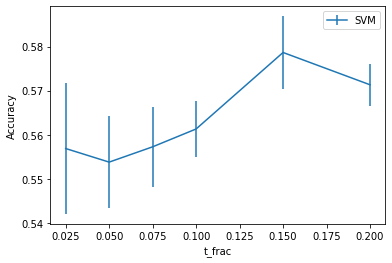

In [134]:
import matplotlib.pyplot as plt 
fraction_list = [0.025,0.05,0.075,0.1,0.15,0.2]
svm_data = []
lr_data = []
f = 0.025
ind = 5
for f in fraction_list:
    svm_record = []
    lr_record = []
    # print("Value of frac:", f)
    for ind in range(10):
        test_set = fold_data_list[ind]
        rem_set = []
        for k, data in enumerate(fold_data_list):
            if(k!=ind):
                rem_set.append(fold_data_list[k])
        new_train_set = pd.concat(rem_set)
        new_train_set = new_train_set.sample(random_state=32, frac=f)
        new_X_train, new_y_train = get_features_labels(new_train_set)
        new_X_test, new_y_test = get_features_labels(test_set)
        weights = run_svm(new_X_train, new_y_train, 0.01, 500, 0.5, True)
        # print("Value of ind: ", ind)
        svm_record.append(model_accuracy(new_X_test, new_y_test, weights))
        # get_accuracy(new_X_train, new_y_train, new_X_test, new_y_test, weights)
    svm_mean = np.mean(svm_record)
    svm_std = np.sqrt(np.var(svm_record))
    svm_std_err = svm_std/np.sqrt(10)
    svm_data.append([f, svm_mean, svm_std_err])
svm_data=np.array(svm_data)
plt.errorbar(fraction_list, svm_data[:, 1], yerr=svm_data[:, 2], label='SVM')
plt.xlabel('t_frac')
plt.ylabel('Accuracy')
plt.legend()

In [142]:
def sigmoid(z):
	    return(1 / (1 + np.exp(-z)))  # z = w.T.dot(x_i)

def cost_func(features, target, weights, lamb):
    scores = np.dot(features, weights)
    cf = np.sum( target*scores - np.log(1 + np.exp(scores)) )  +  lamb/(2) * np.dot(weights, weights)
    return cf

def logistic_regression(features, target, lamb, num_steps, learning_rate, add_intercept):
    if add_intercept:
        bias = np.ones((features.shape[0], 1))
        features = np.concatenate((bias, features), axis=1)
    
    weights = np.zeros(features.shape[1]) 
    
    for step in range(0, num_steps):
        w1 = np.array(weights)
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
       	output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal) +  (lamb * weights)
        weights += learning_rate * gradient
        w2 = np.array(weights)
        diff = np.subtract(w2, w1)
        l2 = norm(diff)
        if l2 < 0.000001:
        	break
        
    	
        # Print log-likelihood every so often
        #if step % 10 == 0:
            #print cost_func(features, target, weights)
    return weights

def lr_accuracy(X, y, weights):
    bias = np.ones((X.shape[0], 1))
    X = np.concatenate((bias, X), axis=1)
    preds = np.round(sigmoid(np.dot(X, weights)))
    accuracy = (preds == y).sum().astype(float) / len(preds)
    return round(accuracy, 2)

def print_accuracy(train_features, train_labels, X_test, test_label, weights):
    print ('Training Accuracy LR:', lr_accuracy(train_features, train_labels, weights))
    print ('Testing Accuracy LR:', lr_accuracy(X_test, test_label, weights))

# run this if modelIdx = 1
def run_lr(X_train, y_train, X_test, y_test):
    lamb = 0.01 
    weights = logistic_regression(X_train, y_train, lamb=lamb, num_steps = 500, learning_rate = 0.01, add_intercept=True)
    print_accuracy(X_train, y_train, X_test, y_test, weights)

In [143]:
    train_data = pd.read_csv('./trainingSet.csv')
    X_train, y_train = get_features_labels(train_data)
    print("x train type", type(X_train))
    test_data = pd.read_csv('./testSet.csv')
    X_test, y_test = get_features_labels(test_data)

    run_lr(X_train, y_train, X_test, y_test)

x train type <class 'numpy.ndarray'>


C:\Users\garga\AppData\Local\Temp/ipykernel_20896/1873876140.py:2: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))  # z = w.T.dot(x_i)


Training Accuracy LR: 0.66
Testing Accuracy LR: 0.66


In [144]:
def get_kfold_split(input_filename, fold_number):
    train_set = pd.read_csv(input_filename)
    #shuffling
    train_set = train_set.sample(random_state=18, frac=1)
    fold_number = 10
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

In [147]:
fold_data_list_nbc = get_kfold_split('./trainingSet_NBC.csv', 10)
len(fold_data_list_nbc[9])

520

In [149]:
def get_train_test_data(fold_data_list, fraction, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    new_train_set = pd.concat(rem_set)
    new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    new_X_train, new_y_train = get_features_labels(new_train_set)
    new_X_test, new_y_test = get_features_labels(test_set)
    return new_X_train, new_y_train, new_X_test, new_y_test
# for nbc
new_X_train, new_y_train, new_X_test, new_y_test = get_train_test_data(fold_data_list_nbc, 0.025, 2)

In [151]:
fraction_list = [0.025,0.05,0.075,0.1,0.15,0.2]
dataset_size = [element*4680 for element in fraction_list]
dataset_size

[117.0, 234.0, 351.0, 468.0, 702.0, 936.0]